In [1]:
import pandas as pd
import numpy as np
import inspect
from sklearn.linear_model import LinearRegression as regress
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_excel('tutorial1.xlsx')
print(data)
Y = data.iloc[:,0].values


x1 = data.iloc[:,1].values #Operating voltage
x2 = data.iloc[:,2].values
x3 = data.iloc[:,3].values
ones_col = np.ones(np.size(x1))
#Calculation of coefficients for linear terms
XL = np.column_stack((x1,x2,x3))


      y   x1    x2   x3
0  2145  110   750  140
1  2155  110   850  180
2  2220  110  1000  140
3  2225  110  1100  180
4  2260  120   750  140
5  2266  120   850  180
6  2334  120  1000  140
7  2340  130  1000  180
8  2212  115   840  150
9  2180  115   880  150


In [3]:
model = regress().fit(XL,Y)
b0 = model.intercept_
linear = model.coef_
b1 = linear[0]
b2 = linear[1]
b3 = linear[2]


linear_coeff = [b0,b1,b2,b3]


In [4]:
print('The coefficients for the linear model are: \n b0 = {} \n b1 = {} \n b2 = {} \n b3 = {} \n\n'.format(b0,b1,b2,b3))


print('The equation is: \n Y = {} + {}*X1 + {}*X2 + {}*X3'.format(b0,b1,b2,b3))


The coefficients for the linear model are: 
 b0 = 1108.7244911480202 
 b1 = 8.639331823916764 
 b2 = 0.2607707242318972 
 b3 = -0.7114061770856739 


The equation is: 
 Y = 1108.7244911480202 + 8.639331823916764*X1 + 0.2607707242318972*X2 + -0.7114061770856739*X3


a) 

In [5]:
xnl = np.column_stack((x1, x2, x3, x1**2, x2**2, x3**2, x1*x2, x2*x3, x1*x3, x1*x2*x3))

In [6]:
model2 = regress().fit(xnl, Y)

In [7]:
b0_a = model2.intercept_

In [8]:
print(b0_a)

-5646.31409826556


In [9]:
coeff_a = model2.coef_

In [10]:
print('10 parameters estimation',coeff_a)

10 parameters estimation [-8.38883587e+01 -1.09819159e+01  2.34054306e+02  5.25026520e-01
  1.37875407e-02 -4.70830777e-01 -2.84091069e-02 -9.14448587e-02
 -1.79055292e-01  2.00065049e-04]


b)

In [11]:
temp_b = 140*np.ones((10, 1))
xnl_b = np.column_stack((x1, x2, x1**2, x2**2, x1*x2, temp_b))
xnl_b

array([[1.1000e+02, 7.5000e+02, 1.2100e+04, 5.6250e+05, 8.2500e+04,
        1.4000e+02],
       [1.1000e+02, 8.5000e+02, 1.2100e+04, 7.2250e+05, 9.3500e+04,
        1.4000e+02],
       [1.1000e+02, 1.0000e+03, 1.2100e+04, 1.0000e+06, 1.1000e+05,
        1.4000e+02],
       [1.1000e+02, 1.1000e+03, 1.2100e+04, 1.2100e+06, 1.2100e+05,
        1.4000e+02],
       [1.2000e+02, 7.5000e+02, 1.4400e+04, 5.6250e+05, 9.0000e+04,
        1.4000e+02],
       [1.2000e+02, 8.5000e+02, 1.4400e+04, 7.2250e+05, 1.0200e+05,
        1.4000e+02],
       [1.2000e+02, 1.0000e+03, 1.4400e+04, 1.0000e+06, 1.2000e+05,
        1.4000e+02],
       [1.3000e+02, 1.0000e+03, 1.6900e+04, 1.0000e+06, 1.3000e+05,
        1.4000e+02],
       [1.1500e+02, 8.4000e+02, 1.3225e+04, 7.0560e+05, 9.6600e+04,
        1.4000e+02],
       [1.1500e+02, 8.8000e+02, 1.3225e+04, 7.7440e+05, 1.0120e+05,
        1.4000e+02]])

In [12]:
model3 = regress().fit(xnl_b, Y)
b0_b = model3.intercept_
print(b0_b)
coeff_b = model3.coef_
print(coeff_b)

-3810.973858587796
[ 1.05929599e+02 -1.84592086e+00 -4.29909946e-01  8.57303426e-04
  4.92322439e-03  0.00000000e+00]


In [22]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(100,  150, 30)
X2 = np.linspace(600, 1100, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


(30, 30)

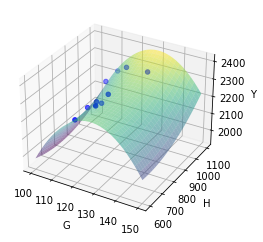

In [24]:
#Here we are plotting the points in 3D
Z1 = b0_b + coeff_b[0]*X1 + coeff_b[1]*X2 + coeff_b[2]*X1*X1 + coeff_b[3]*X2*X2 + coeff_b[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('G')
ax.set_ylabel('H')
ax.set_zlabel('Y')
plt.show()


c)

In [25]:
motor_speed_c = 1000*np.ones((10, 1))
xnl_c = np.column_stack((x1, x3, x1**2, x3**2, x1*x3, motor_speed_c))
xnl_c

array([[  110.,   140., 12100., 19600., 15400.,  1000.],
       [  110.,   180., 12100., 32400., 19800.,  1000.],
       [  110.,   140., 12100., 19600., 15400.,  1000.],
       [  110.,   180., 12100., 32400., 19800.,  1000.],
       [  120.,   140., 14400., 19600., 16800.,  1000.],
       [  120.,   180., 14400., 32400., 21600.,  1000.],
       [  120.,   140., 14400., 19600., 16800.,  1000.],
       [  130.,   180., 16900., 32400., 23400.,  1000.],
       [  115.,   150., 13225., 22500., 17250.,  1000.],
       [  115.,   150., 13225., 22500., 17250.,  1000.]])

In [26]:
model4 = regress().fit(xnl_c, Y)
b0_c = model4.intercept_
print(b0_c)
coeff_c = model4.coef_
print(coeff_c)

2731.7499999996135
[ 2.72250e+01 -3.30250e+01 -1.00000e-02  1.36875e-01 -9.62500e-02
  0.00000e+00]


In [27]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(100,  150, 30)
X2 = np.linspace(120, 190, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


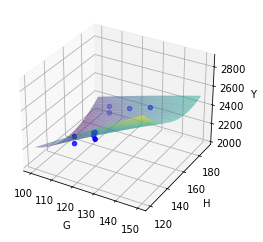

In [28]:
#Here we are plotting the points in 3D
Z1 = b0_c + coeff_c[0]*X1 + coeff_c[1]*X2 + coeff_c[2]*X1*X1 + coeff_c[3]*X2*X2 + coeff_c[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x3, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('G')
ax.set_ylabel('H')
ax.set_zlabel('Y')
plt.show()


d)

In [29]:
temp_d = 140*np.ones((10, 1))
xnl_d = np.column_stack((x1, x2, x1**2, x2**2, temp_b))
xnl_d

array([[1.1000e+02, 7.5000e+02, 1.2100e+04, 5.6250e+05, 1.4000e+02],
       [1.1000e+02, 8.5000e+02, 1.2100e+04, 7.2250e+05, 1.4000e+02],
       [1.1000e+02, 1.0000e+03, 1.2100e+04, 1.0000e+06, 1.4000e+02],
       [1.1000e+02, 1.1000e+03, 1.2100e+04, 1.2100e+06, 1.4000e+02],
       [1.2000e+02, 7.5000e+02, 1.4400e+04, 5.6250e+05, 1.4000e+02],
       [1.2000e+02, 8.5000e+02, 1.4400e+04, 7.2250e+05, 1.4000e+02],
       [1.2000e+02, 1.0000e+03, 1.4400e+04, 1.0000e+06, 1.4000e+02],
       [1.3000e+02, 1.0000e+03, 1.6900e+04, 1.0000e+06, 1.4000e+02],
       [1.1500e+02, 8.4000e+02, 1.3225e+04, 7.0560e+05, 1.4000e+02],
       [1.1500e+02, 8.8000e+02, 1.3225e+04, 7.7440e+05, 1.4000e+02]])

In [30]:
model5 = regress().fit(xnl_d, Y)
b0_d = model5.intercept_
print(b0_d)
coeff_d = model5.coef_
print(coeff_d)

-3714.3970153772307
[ 9.85215808e+01 -1.09016513e+00 -3.79018942e-01  7.47921577e-04
  0.00000000e+00]


In [31]:
#To plot surface get some equally spaced values of G and H
X1 = np.linspace(100,  150, 30)
X2 = np.linspace(600, 1100, 30)


#This is required for plotting surface
X1, X2 = np.meshgrid(X1, X2)


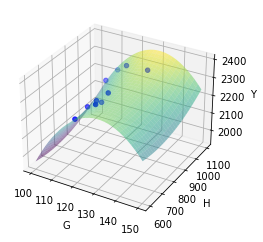

In [32]:
#Here we are plotting the points in 3D
Z1 = b0_d + coeff_d[0]*X1 + coeff_d[1]*X2 + coeff_d[2]*X1*X1 + coeff_d[3]*X2*X2 + coeff_d[4]*X1*X2 
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(X1, X2, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('G')
ax.set_ylabel('H')
ax.set_zlabel('Y')
plt.show()
